# CNN Model 2 - Overfitting techniques
The first CNN we tried overfit very quickly. We'll try several techinques to alleviate it.

**Notes:**
Example model adapted from "Deep Learning with Python" textbook. Things we can play with are: how many convolution layers, how many dense layers, number of nodes/stacks in each layer, and padding. 

**Changes:**
Same as original model, but with width shift preprocessing (`fill = 'constant'`), and a dropout layer. 


Link this notebook to Google Drive

# Loading data from Google Drive
We ran this notebook in Google Colab. If you do as well, you can upload the images to your Google Drive. Use this command to link the notebook and Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/spectrograms_cnn_base.zip

Streaming output truncated to the last 5000 lines.
  inflating: spectrograms_cnn_base/test/DIS/1029_ITH_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1089_IWL_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1039_MTI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1034_ITH_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1032_TIE_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1039_DFA_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1080_IWW_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1039_WSI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1068_TSI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1043_TIE_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1051_ITS_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1028_TAI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1060_IOM_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1070_IWW_DIS_XX.png  
  inflating: spectrograms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import modules

In [ ]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [ ]:
## Importing the things we need from keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load all data
Load data and set the dimension parameters.

In [ ]:
# Set the shape of the images to be loaded into the model:

pixel_height = 219     # This is the FIRST coordinate in the files
pixel_width = 269      # This is the SECOND coordinate in the files
channels = 3           # 3 because we're using RGB


# Type in the paths to the train, validation, and test directories here:

train_dir = 'spectrograms_cnn_base/train'
test_dir = 'spectrograms_cnn_base/test'
validation_dir = 'spectrograms_cnn_base/validation'






# Compile CNN
Same as original model, but with width shift preprocessing (`fill = 'constant'`), and a dropout layer.

In [ ]:
# Same as original model, but with width shift preprocessing (fill = 'constant'), and a dropout layer. 


model = models.Sequential()

# First conv layer, followed by pooling layer:
model.add(layers.Conv2D(16, (3, 3), activation = 'relu',
          input_shape = (pixel_height, pixel_width, channels)))

model.add(layers.MaxPooling2D((2, 2)))

# Second conv layer, followed by pooling layer:


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Third conv layer, followed by pooling layer:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Fourth conv layer, followed by pooling layer:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Flatten to 1d:
model.add(layers.Flatten())

# Dropout layer:
model.add(layers.Dropout(0.5))

# First dense layer, with 512 nodes:
model.add(layers.Dense(512, activation='relu'))

# Last dense layer, with 6 nodes (one per emotion):
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 267, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 133, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 131, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 65, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 63, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 31, 64)       0

In [ ]:
# Compile the network
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN

In [ ]:
# Create generators that will import and preprocess spectrograms in batches:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2,
                                   fill_mode = 'constant',
                                   cval = 190) # rescale so values are between 0 and 1
test_datagen = ImageDataGenerator(rescale = 1./255)  # rescale so values are between 0 and 1

# Batch size -- this affects runtime
batch_size = 50

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (pixel_height, pixel_width),
                    batch_size = batch_size,
                    class_mode = 'categorical')


validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (pixel_height, pixel_width),
                    batch_size = batch_size,
                    class_mode = 'categorical')





Found 3900 images belonging to 6 classes.
Found 976 images belonging to 6 classes.


In [ ]:
# We have:
# 3900 training images
# 976 validation images

# Fit the model using the generators from above:
train_steps = 78
val_steps = 20
epochs = 30

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_steps,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=val_steps)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/30
78/78 [==============================] - 280s 4s/step - loss: 1.7605 - accuracy: 0.2313 - val_loss: 1.6148 - val_accuracy: 0.3258
Epoch 2/30
78/78 [==============================] - 275s 4s/step - loss: 1.6414 - accuracy: 0.3195 - val_loss: 1.5803 - val_accuracy: 0.3566
Epoch 3/30
78/78 [==============================] - 272s 3s/step - loss: 1.5741 - accuracy: 0.3479 - val_loss: 1.4916 - val_accuracy: 0.3996
Epoch 4/30
78/78 [==============================] - 270s 3s/step - loss: 1.4880 - accuracy: 0.3879 - val_loss: 1.3896 - val_accuracy: 0.4334
Epoch 5/30
78/78 [==============================] - 270s 3s/step - loss: 1.4420 - accuracy: 0.4203 - val_loss: 1.3902 - val_accuracy: 0.4293
Epoch 6/30
78/78 [==============================] - 275s 4s/step - loss: 1.4148 - accuracy: 0.4279 - val_loss: 1.3321 - val_accuracy: 0.4713
Epoch 7/30
78/78 [==============================] - 271s 3s/step - loss: 1.3753 - accuracy: 0.4449 - val_loss: 1.2974 - val_accuracy: 0.4846
Epoch 8/30
78

In [ ]:
# Save the model:
## Use this if you're running the notebook in your computer
# model.save('Model2')

## Use this if you're using Google Colab
model.save('/content/gdrive/MyDrive/Model2')

INFO:tensorflow:Assets written to: pathname_Model2/assets


# Plot accuracy

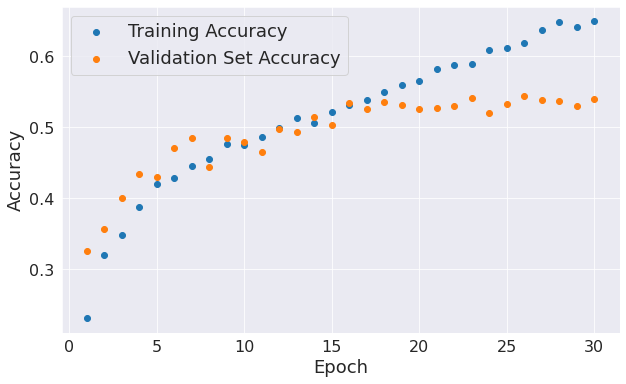

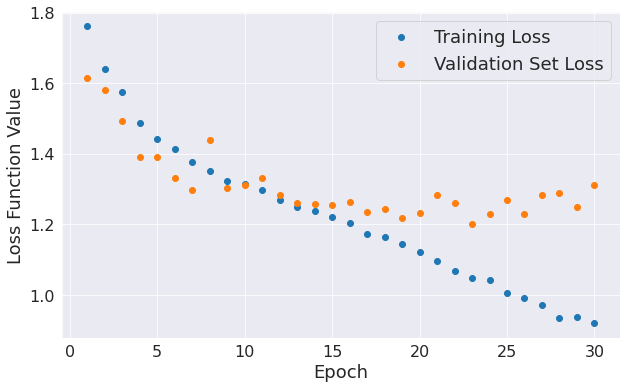

In [ ]:
history_dict = history.history

plt.figure(figsize = (10,6))

plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (10,6))

plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()